In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colormaps  # Import colormaps

pd.options.display.float_format = '{:,.2f}'.format
# ปิดการแสดงคำเตือน SettingWithCopyWarning ชั่วคราว
pd.options.mode.chained_assignment = None  # ปิดการแสดงคำเตือน

In [3]:
from matplotlib.font_manager import fontManager
# import matplotlib as mpl

# Add font to font manager
fontManager.addfont('/Users/seal/Documents/GitHub/hackathon-nt-2024/fonts/Sarabun/Sarabun-Regular.ttf')
# Set the font for your plot
plt.rcParams['font.family'] = 'Sarabun'
# Set font size for all plot elements
plt.rcParams['font.size'] = 12
# mpl.rc("font", family="Sarabun", size=24)

In [4]:
df = pd.read_csv("SUMMARY_PAYMENT.csv")

In [5]:
df

,ACCOUNT_NO,SERVICED_NUMBER,PAYMENT_DATE,INVOICE_DATE,PAY_TYPE,payment_type,AMOUNT,DAYS_DIFF
0,100000098,021781046,2022-01-12,2021-12-11,DC,Batch,100.00,32
1,100000098,021781046,2022-02-14,2022-01-10,DC,Batch,100.00,35
2,100000098,021781046,2022-03-14,2022-02-10,DC,Batch,100.00,32
3,100000098,021781046,2022-04-12,2022-03-11,DC,Batch,100.00,32
4,100000098,021781046,2022-05-12,2022-04-11,DC,Batch,100.00,31
...,...,...,...,...,...,...,...,...
17021886,104533246834,4441J1226,2022-12-29,2022-08-11,CA,POS,290.00,140
17021887,104533246834,4441J1226,2022-12-29,2022-09-11,CA,POS,290.00,109
17021888,104533246834,4441J1226,2022-12-29,2022-10-11,CA,POS,290.00,79
17021889,104533246834,4441J1226,2022-12-29,2022-11-11,CA,POS,290.00,48


In [6]:
summary_billing_df = pd.read_csv("/Users/seal/Documents/GitHub/hackathon-nt-2024/datasets/data/Billing/SUMMARY_BILLING_2023.csv")

In [7]:
summary_billing_df

,ACCOUNT_NO,TEL_NO,PRODUCT DESC,ACCOUNT_TYPE,BANK_CODE,CUSTOMER_REF,SERVICE_LOCATION NAME,INACTIVE_DATE,ACTIVE_DATE,AMOUNT_DUE
0,100000876,022000030,N-ISDN - BAI,Corporate - Key Account (JorKorBor),D,1-KHM-0,ศูนย์บริการNT สุรวงศ์,2023-02-01,2011-03-11,"10,645.50"
1,100002342,022000364,N-ISDN - BAI,Corporate (CSC/YorTor),C,1-E3K-0,ศูนย์บริการ NT สุรวงศ์,2023-03-24,1998-02-20,"9,032.00"
2,100003110,022311925,Normal telephone,Business - Key Account (JorKorBor),C,1-YB-295,ศูนย์บริการ NT สุรวงศ์,2023-04-11,2021-10-01,"5,166.50"
3,100003110,022311925A,ADSL,Business - Key Account (JorKorBor),C,1-YB-295,ศูนย์บริการ NT สุรวงศ์,2023-04-11,2021-10-01,"25,316.50"
4,100003776,022000641,N-ISDN - BAI,Business - Key Account (JorKorBor),D,1-140-1433,ศูนย์บริการ NT สุรวงศ์,2023-03-21,2000-04-20,"7,097.00"
...,...,...,...,...,...,...,...,...,...,...
64816,104533376834,022867856,Normal telephone,Residential - Normal,D,CA-660927-0000119,ศูนย์บริการ NT คลองเตย,2023-10-29,2023-09-26,"1,290.00"
64817,104533378421,4357J9681,Fiber 2U,Residential - Normal,D,CA-660929-0000231,ศูนย์บริการ NT โพนทอง,2023-11-20,2023-09-06,"14,500.00"
64818,104533387006,038196519,IP Phone,Residential - Normal,D,CA-190001641259,ศูนย์บริการ NT พัทยา 1,2023-11-23,2023-10-11,"4,333.00"
64819,104533387262,038432470,Normal telephone,Residential - Normal,D,1-2DQ77O,ศูนย์บริการ NT สัตหีบ 1,2023-10-24,2023-10-01,"3,871.00"


In [8]:
summary_billing_df.columns

Index(['ACCOUNT_NO', 'TEL_NO', 'PRODUCT DESC', 'ACCOUNT_TYPE', 'BANK_CODE',
       'CUSTOMER_REF', 'SERVICE_LOCATION NAME', 'INACTIVE_DATE', 'ACTIVE_DATE',
       'AMOUNT_DUE'],
      dtype='object')

In [9]:
billing = summary_billing_df[['ACCOUNT_NO', 'TEL_NO', 'PRODUCT DESC', 'ACCOUNT_TYPE', 
       'SERVICE_LOCATION NAME', 'ACTIVE_DATE',
       'AMOUNT_DUE']]

In [10]:
# รวมข้อมูลโดยใช้คอลัมน์ 'ACCOUNT_NO' เป็นคีย์
merged_df = pd.merge(df, summary_billing_df, on='ACCOUNT_NO', how='inner')

# แสดงข้อมูลที่ถูกรวม
print(merged_df.head())
print(merged_df.dtypes)

   ACCOUNT_NO SERVICED_NUMBER PAYMENT_DATE INVOICE_DATE PAY_TYPE payment_type  \
0   100000876       022000030   2022-01-12   2021-12-11       DD        Batch   
1   100000876       022000030   2022-02-14   2022-01-10       DD        Batch   
2   100000876       022000030   2022-03-14   2022-02-10       DD        Batch   
3   100000876       022000030   2022-04-12   2022-03-11       DD        Batch   
4   100000876       022000030   2022-05-12   2022-04-11       DD        Batch   

   AMOUNT  DAYS_DIFF     TEL_NO  PRODUCT DESC  \
0  300.00         32  022000030  N-ISDN - BAI   
1  300.00         35  022000030  N-ISDN - BAI   
2  300.00         32  022000030  N-ISDN - BAI   
3  300.00         32  022000030  N-ISDN - BAI   
4  300.00         31  022000030  N-ISDN - BAI   

                          ACCOUNT_TYPE BANK_CODE CUSTOMER_REF  \
0  Corporate - Key Account (JorKorBor)         D      1-KHM-0   
1  Corporate - Key Account (JorKorBor)         D      1-KHM-0   
2  Corporate - Key Acco

In [16]:
merged_df.dtypes

ACCOUNT_NO                 int64
SERVICED_NUMBER           object
PAYMENT_DATE              object
INVOICE_DATE              object
PAY_TYPE                  object
payment_type              object
AMOUNT                   float64
DAYS_DIFF                  int64
TEL_NO                    object
PRODUCT DESC              object
ACCOUNT_TYPE              object
BANK_CODE                 object
CUSTOMER_REF              object
SERVICE_LOCATION NAME     object
INACTIVE_DATE             object
ACTIVE_DATE               object
AMOUNT_DUE               float64
dtype: object

In [11]:
len(merged_df)

710890

In [12]:
# แปลงค่าของ PAY_TYPE ตามพจนานุกรม
pay_type_dict = {
    "CA": "เงินสด",
    "DD": "หักผ่านบัญชีธนาคาร",
    "CQ": "จ่ายผ่านเช็ค",
    "DC": "หักผ่านบัตรเครดิต",
    "CC": "รูดบัตรเครดิต หรือ Scanจ่าย",
    "PY": "จ่ายจากส่วนกลาง",
    "CH": "จ่ายผ่านแคชเชียร์เช็ค"
}
merged_df.loc[:, 'PAY_TYPE'] = merged_df['PAY_TYPE'].map(pay_type_dict)

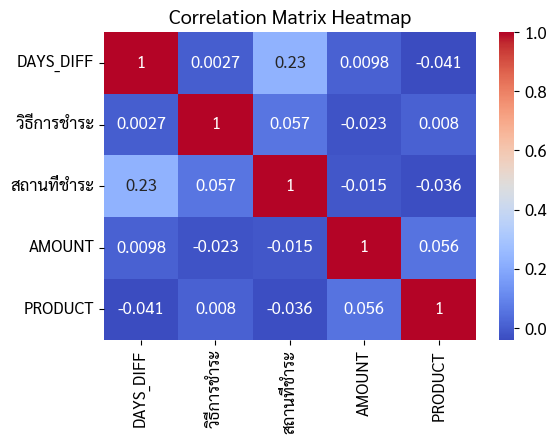

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
merged_df['วิธีการชำระ'] = le.fit_transform(merged_df['PAY_TYPE'])
merged_df['สถานที่ชำระ'] = le.fit_transform(merged_df['payment_type'])
# PRODUCT DESC
merged_df['PRODUCT'] = le.fit_transform(merged_df['PRODUCT DESC'])

plt. figure(figsize= (6,4))
sns.heatmap(merged_df[["DAYS_DIFF","วิธีการชำระ", "สถานที่ชำระ", "AMOUNT","PRODUCT"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
merged_df.to_csv("Payment Product.csv", index=False, float_format="%.2f")

In [19]:
target_group = merged_df[(merged_df['DAYS_DIFF'] <= 38) & (merged_df['DAYS_DIFF'] >= 28)]

In [20]:
target_group.to_csv("Target Payment Product.csv", index=False, float_format="%.2f")